In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Architecture of MLP

In [28]:
#Model parameters 

input_size = 3 # no of features
layers=[4,3] # no of neurons in 1st and 2nd layer
output_size= 2 #for example tell if pic if a dog or cat 

In [29]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    
        

In [30]:
a=np.array([[5,10]])
a_=softmax(a)
print(a_)

[[0.00669285 0.99330715]]


In [31]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)


        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,X,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
    



In [42]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth): #depth= number of classes
    
    m = y.shape[0]
   
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [43]:
a=np.array([[1,2,3,4],[6,7,89,9]])
q=np.zeros((a.shape[0],a.shape[1]))
q=a[np.arange(2),1]
print(q)

[2 7]


### Generating Datsets

In [44]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [45]:
x,y=make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

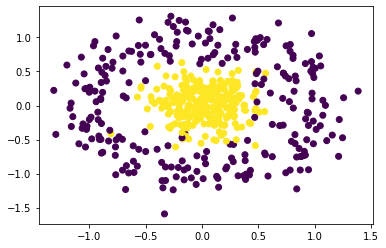

In [46]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [47]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


### Training Model

In [48]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)


In [49]:
model.forward(x[0])
model.summary()

W1  (2, 10)
A1  (1, 10)
W2  (10, 5)
A2  (1, 5)
W3  (5, 2)
Y_  (1, 2)


In [50]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [51]:
losses=train(x,y,model,500,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

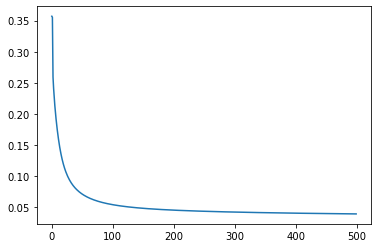

In [204]:
plt.plot(losses)

In [207]:
from visualise import plot_decision_boundary

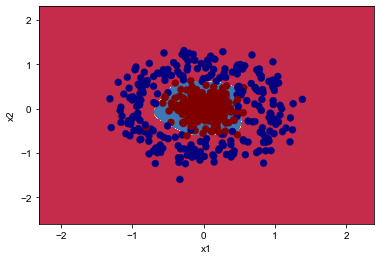

In [213]:
plot_decision_boundary(lambda x:model.predict(x),X,y)

In [214]:
outputs = model.predict(X)

In [216]:
training_accuracy = np.sum(outputs==y)/y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


### XOR Dataset

In [271]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [272]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
             ])

Y = np.array([0,1,1,0])

In [273]:
losses = train(X,Y,model,500,0.01)

Epoch 0 Loss 0.3427
Epoch 1 Loss 0.3244
Epoch 2 Loss 0.3103
Epoch 3 Loss 0.2990
Epoch 4 Loss 0.2895
Epoch 5 Loss 0.2811
Epoch 6 Loss 0.2736
Epoch 7 Loss 0.2666
Epoch 8 Loss 0.2601
Epoch 9 Loss 0.2539
Epoch 10 Loss 0.2481
Epoch 11 Loss 0.2426
Epoch 12 Loss 0.2373
Epoch 13 Loss 0.2324
Epoch 14 Loss 0.2277
Epoch 15 Loss 0.2233
Epoch 16 Loss 0.2191
Epoch 17 Loss 0.2153
Epoch 18 Loss 0.2117
Epoch 19 Loss 0.2083
Epoch 20 Loss 0.2052
Epoch 21 Loss 0.2023
Epoch 22 Loss 0.1995
Epoch 23 Loss 0.1970
Epoch 24 Loss 0.1945
Epoch 25 Loss 0.1922
Epoch 26 Loss 0.1901
Epoch 27 Loss 0.1880
Epoch 28 Loss 0.1860
Epoch 29 Loss 0.1841
Epoch 30 Loss 0.1822
Epoch 31 Loss 0.1804
Epoch 32 Loss 0.1787
Epoch 33 Loss 0.1770
Epoch 34 Loss 0.1753
Epoch 35 Loss 0.1736
Epoch 36 Loss 0.1720
Epoch 37 Loss 0.1704
Epoch 38 Loss 0.1688
Epoch 39 Loss 0.1672
Epoch 40 Loss 0.1656
Epoch 41 Loss 0.1640
Epoch 42 Loss 0.1624
Epoch 43 Loss 0.1609
Epoch 44 Loss 0.1593
Epoch 45 Loss 0.1578
Epoch 46 Loss 0.1562
Epoch 47 Loss 0.1546
Ep

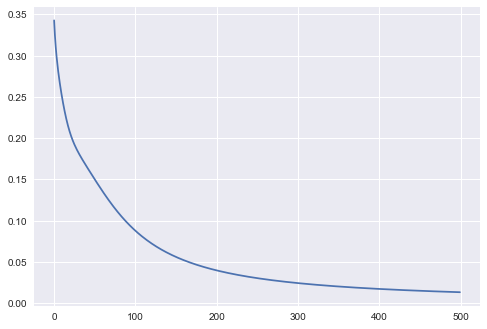

In [274]:
plt.plot(losses)

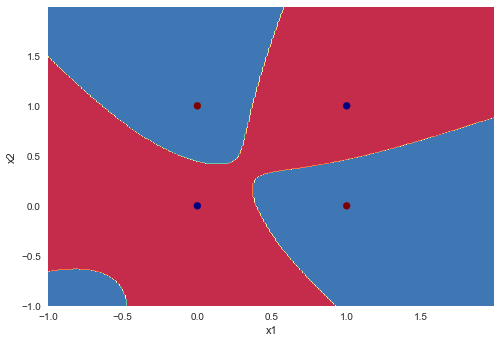

In [275]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

### Other Datasets

In [276]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [277]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 1.0000


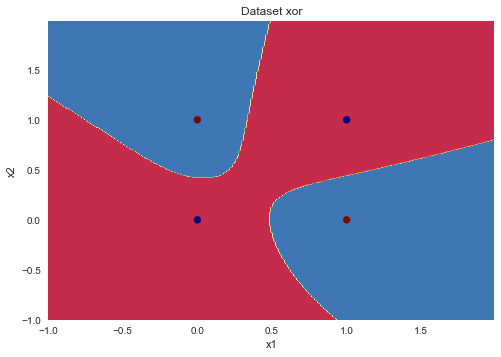

Training Acc 0.9600


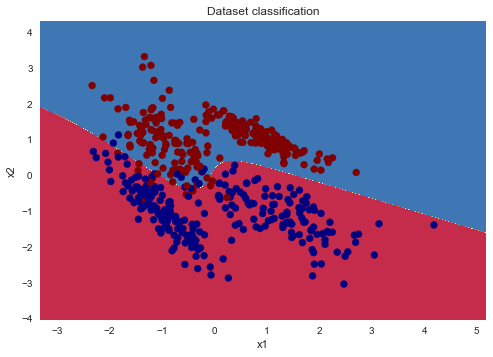

Training Acc 0.9740


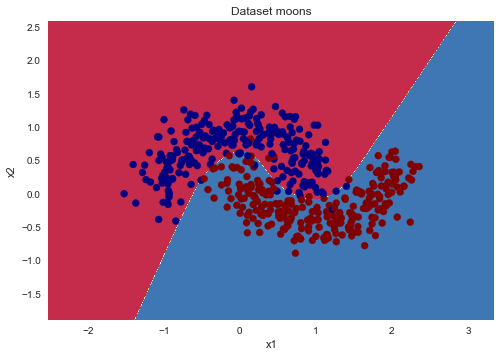

Training Acc 0.9640


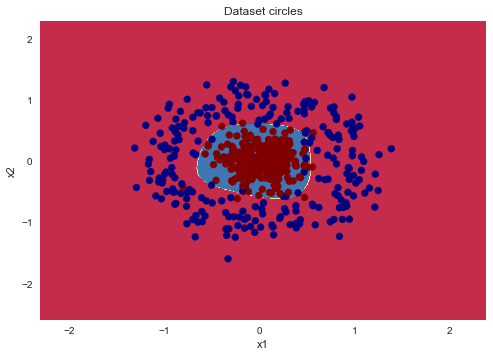

In [278]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()